In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler as sds
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df_raw = pd.read_csv("rawdata/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other", inplace = True)

In [5]:
df_raw.fillna(df_raw.mean(), inplace = True)

In [6]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size\t: {}".format(df_train.shape))
print("test data size\t: {}".format(df_test.shape))

train data size	: (2623, 13)
test data size	: (1125, 13)


In [11]:
for i in list(df_raw):
    print (i, end = " + ")

BAD + LOAN + MORTDUE + VALUE + REASON + JOB + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC + 

In [23]:
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + 
                                DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        10:42:29   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [37]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [27]:
print("Accuracy: %.3f \n" % accuracy_score(df_test["BAD"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_class)))

Accuracy: 0.924 

Confusion Matrix:
[[1017    4]
 [  81   23]]


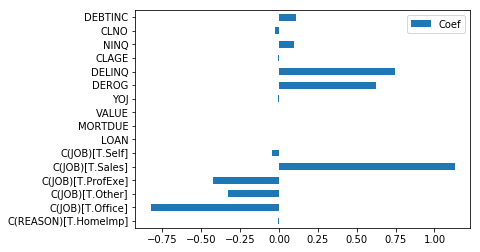

In [29]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [39]:
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

scaler = sds()
np_numeric_scaled = scaler.fit_transform(df_numeric) # 여기 트랜스폼 왜 해준거지..?
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
df_char 

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office
5,HomeImp,Office
6,HomeImp,Office
7,HomeImp,Other
8,DebtCon,Mgr
9,HomeImp,Office


In [43]:
df_numeric

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,9.000000,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,11.000000,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,2.000000,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,12.000000,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,4.000000,0,0.0,93.811775,0.0,13,29.681827
5,0,2900,103949,112505.0,1.000000,0,0.0,96.102330,0.0,13,30.051136
6,0,2900,104373,120702.0,2.000000,0,0.0,101.540297,0.0,13,29.915859
7,1,2900,7750,67996.0,16.000000,3,0.0,122.204663,2.0,8,36.211348
8,1,2900,61962,70915.0,2.000000,0,0.0,282.801659,3.0,37,49.206396
9,0,3000,104570,121729.0,2.000000,0,0.0,85.884372,0.0,14,32.059783


In [44]:
np_numeric_scaled

array([[ 3.14066364, -1.55958709, -0.99362609, ..., -0.01877581,
        -1.42835003,  0.3563475 ],
       [ 3.14066364, -1.55081727, -1.03923952, ..., -0.66662887,
        -1.42835003,  0.32902459],
       [-0.31840404, -1.50696816,  0.60757021, ..., -0.66662887,
        -0.90513262, -0.30368403],
       ...,
       [-0.31840404,  6.11400782, -0.46978508, ..., -0.66662887,
        -0.69584565,  0.170345  ],
       [-0.31840404,  6.16662676, -0.55171535, ..., -0.66662887,
        -0.59120217,  0.02511611],
       [-0.31840404,  6.17539658, -0.58647163, ..., -0.66662887,
        -0.59120217,  0.05266805]])

In [47]:
df_numeric_scaled

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.140664,-1.559587,-0.993626,-1.224910,-1.756277e-02,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,3.140664,-1.550817,-1.039240,-1.174897,2.518091e-01,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-0.318404,-1.506968,0.607570,0.260973,-9.603644e-01,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,3.140664,-1.498198,-0.897428,-1.093133,3.864951e-01,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-0.318404,-1.498198,0.520156,0.191721,-6.909925e-01,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456
5,-0.318404,-1.454349,0.642772,0.105295,-1.095050e+00,-0.267462,-0.342558,-1.032682,-0.666629,-0.905133,-0.487338
6,-0.318404,-1.454349,0.652225,0.256347,-9.603644e-01,-0.267462,-0.342558,-0.966437,-0.666629,-0.905133,-0.503499
7,3.140664,-1.454349,-1.501884,-0.714904,9.252388e-01,4.711578,-0.342558,-0.714703,0.629077,-1.428350,0.248563
8,3.140664,-1.454349,-0.293284,-0.661114,-9.603644e-01,-0.267462,-0.342558,1.241694,1.276930,1.606311,1.800955
9,-0.318404,-1.445579,0.656617,0.275272,-9.603644e-01,-0.267462,-0.342558,-1.157158,-0.666629,-0.800489,-0.247385


In [48]:
df_scaled["BAD"] = np.where(df_scaled["BAD"]> 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [49]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [50]:
scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + 
                                DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        12:11:24   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

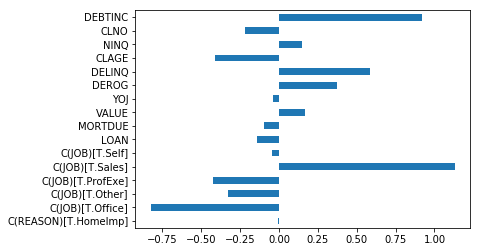

In [59]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)
